## Ensemble Learning

### Ada Boosting

In [1]:
import numpy as np
import pandas as pd

from mlxtend.plotting import plot_decision_regions

In [3]:
!pip install mlxtend

                                              0.0/1.4 MB ? eta -:--:--
                                              0.0/1.4 MB ? eta -:--:--
                                              0.0/1.4 MB ? eta -:--:--
     --                                       0.1/1.4 MB 770.8 kB/s eta 0:00:02
     --                                       0.1/1.4 MB 479.1 kB/s eta 0:00:03
     -----                                    0.2/1.4 MB 892.5 kB/s eta 0:00:02
     ------                                   0.2/1.4 MB 811.5 kB/s eta 0:00:02
     ----------                               0.4/1.4 MB 1.1 MB/s eta 0:00:01
     -----------                              0.4/1.4 MB 1.1 MB/s eta 0:00:01
     ------------                             0.5/1.4 MB 1.1 MB/s eta 0:00:01
     ------------                             0.5/1.4 MB 1.1 MB/s eta 0:00:01
     ------------------                       0.7/1.4 MB 1.3 MB/s eta 0:00:01
     ------------------                       0.7/1.4 MB 1.2 MB/s eta 0:00:01

In [2]:
df = pd.DataFrame()

In [3]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df["Label"] = [1,1,0,1,0,1,0,1,0,0]

In [4]:
import seaborn as sns

<Axes: xlabel='X1', ylabel='X2'>

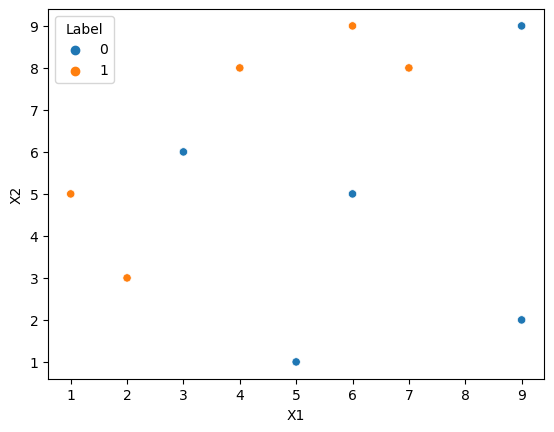

In [5]:
sns.scatterplot(x=df["X1"], y = df["X2"], hue = df['Label'])

In [6]:
df['Sample_weights'] = 1/df.shape[0]

In [7]:
df

,X1,X2,Label,Sample_weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
DT1  = DecisionTreeClassifier(max_depth= 1)

In [10]:
X = df.iloc[:,0:2]

In [11]:
y = df.iloc[:,2]

In [12]:
X

,X1,X2
0,1,5
1,2,3
2,3,6
3,4,8
4,5,1
5,6,9
6,6,5
7,7,8
8,9,9
9,9,2


In [13]:
y

0    1
1    1
2    0
3    1
4    0
5    1
6    0
7    1
8    0
9    0
Name: Label, dtype: int64

In [17]:
DT1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

In [18]:
from sklearn.tree import plot_tree

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

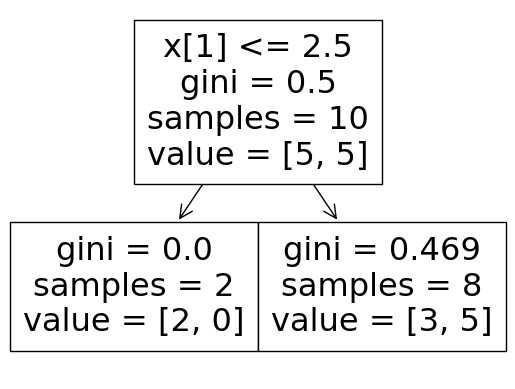

In [19]:
plot_tree(DT1)

In [20]:
np.array(X)

array([[1, 5],
       [2, 3],
       [3, 6],
       [4, 8],
       [5, 1],
       [6, 9],
       [6, 5],
       [7, 8],
       [9, 9],
       [9, 2]], dtype=int64)

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

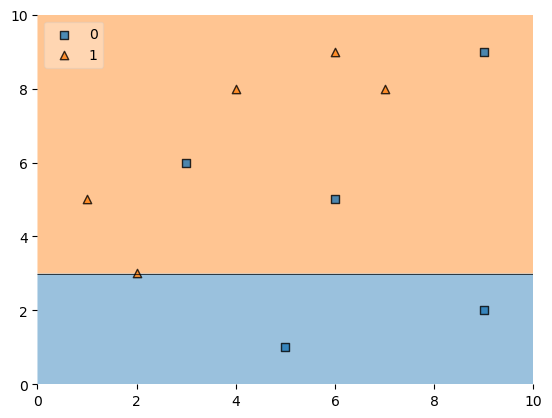

In [21]:
plot_decision_regions(np.array(X),np.array(y),clf=DT1, legend=2)

In [22]:
df['y_pred'] = DT1.predict(X)

In [23]:
df

,X1,X2,Label,Sample_weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [24]:
#calculating performance of the stump

def calculate_model_weight(error):
    return 0.5*np.log((1-error)/(error))

In [25]:
alpha1 = calculate_model_weight(0.3)
alpha1

0.42364893019360184

In [26]:
# calculate updated weights

def update_row_weight(row,alpha=0.423):
    #Correct classifier
    if row['Label'] == row['y_pred']:
        return row['Sample_weights'] * np.exp(-alpha)
    
    # Incorrect classifier
    else:
        return row['Sample_weights'] * np.exp(alpha)
        

In [27]:
df['updated_weights'] = df.apply(update_row_weight, axis= 1)

In [28]:
df

,X1,X2,Label,Sample_weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [29]:
df["Sample_weights"].sum()

1.0

In [30]:
df['updated_weights'].sum()

0.9165153319682015

In [31]:
# Normalizing the weight

df['Normalize_weights'] = df['updated_weights'] / df['updated_weights'].sum()

In [32]:
df

,X1,X2,Label,Sample_weights,y_pred,updated_weights,Normalize_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [33]:
df['Normalize_weights'].sum()

1.0

In [34]:
# Cumulative Sum
np.cumsum(df['Normalize_weights'])

0    0.071475
1    0.142950
2    0.309508
3    0.380983
4    0.452458
5    0.523933
6    0.690492
7    0.761967
8    0.928525
9    1.000000
Name: Normalize_weights, dtype: float64

In [35]:


df['cumsum_upper'] = np.cumsum(df['Normalize_weights'])

df['cumsum_lower'] = df['cumsum_upper'] - df['Normalize_weights']

df[['X1', 'X2', 'Label', 'Sample_weights', 'y_pred', 'updated_weights', 'cumsum_lower', 'cumsum_upper']]

,X1,X2,Label,Sample_weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.142950,0.309508
3,4,8,1,0.1,1,0.065508,0.309508,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,1,0.065508,0.452458,0.523933
6,6,5,0,0.1,1,0.152653,0.523933,0.690492
7,7,8,1,0.1,1,0.065508,0.690492,0.761967
8,9,9,0,0.1,1,0.152653,0.761967,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [36]:
# Doing a random sampling for my nex DT
# generating 10 random weights
indexes = []

for i in range(df.shape[0]):
    a = np.random.random()
    for index, row in df.iterrows():
        if row['cumsum_upper'] > a and a > row['cumsum_lower']:
            indexes.append(index) 
        
       
    

In [37]:
indexes

[9, 9, 9, 2, 0, 8, 6, 1, 2, 2]

In [38]:
# more importance is given to misclassified points

In [39]:
second_df = df.iloc[indexes][["X1","X2","Label","Sample_weights"]]

In [40]:
second_df

,X1,X2,Label,Sample_weights
9,9,2,0,0.1
9,9,2,0,0.1
9,9,2,0,0.1
2,3,6,0,0.1
0,1,5,1,0.1
8,9,9,0,0.1
6,6,5,0,0.1
1,2,3,1,0.1
2,3,6,0,0.1
2,3,6,0,0.1


In [41]:
from sklearn.tree import DecisionTreeClassifier
DT2 = DecisionTreeClassifier(max_depth =1)

In [42]:
X = second_df.iloc[:, 0:2].values
y = second_df.iloc[:, 2].values

In [43]:
DT2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]')]

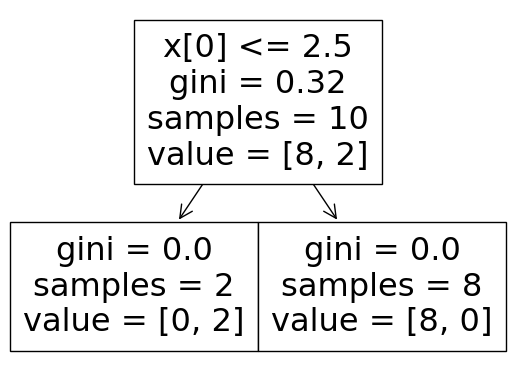

In [44]:
plot_tree(DT2)

<Axes: >

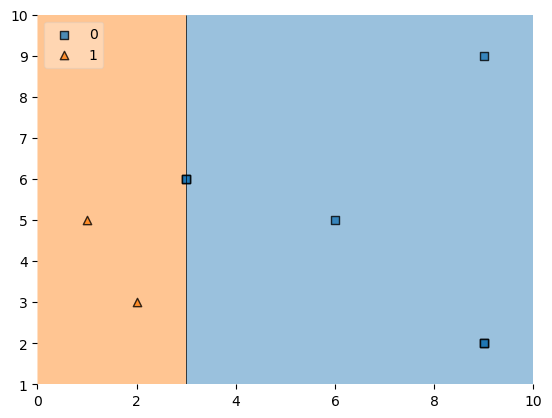

In [45]:
plot_decision_regions(X,y,clf =DT2, legend=2)

In [46]:
second_df["y_pred"] = DT2.predict(X)

In [47]:
second_df

,X1,X2,Label,Sample_weights,y_pred
9,9,2,0,0.1,0
9,9,2,0,0.1,0
9,9,2,0,0.1,0
2,3,6,0,0.1,0
0,1,5,1,0.1,1
8,9,9,0,0.1,0
6,6,5,0,0.1,0
1,2,3,1,0.1,1
2,3,6,0,0.1,0
2,3,6,0,0.1,0


In [48]:
alpha2 = calculate_model_weight(0.2)

In [49]:
alpha2

0.6931471805599453

In [50]:
def update_row_weights(row, alpha=0.69):
    if row['Label'] == row['y_pred']:
        return row['Sample_weights'] * np.exp(-alpha)
    else:
        return row['Sample_weights'] * np.exp(alpha)

In [51]:
second_df['updated_weights'] = second_df.apply(update_row_weight, axis= 1)

In [52]:
second_df

,X1,X2,Label,Sample_weights,y_pred,updated_weights
9,9,2,0,0.1,0,0.065508
9,9,2,0,0.1,0,0.065508
9,9,2,0,0.1,0,0.065508
2,3,6,0,0.1,0,0.065508
0,1,5,1,0.1,1,0.065508
8,9,9,0,0.1,0,0.065508
6,6,5,0,0.1,0,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,0,0.065508
2,3,6,0,0.1,0,0.065508


In [53]:
second_df['Normalize_weights'] = second_df['updated_weights'] / second_df['updated_weights'].sum()

In [54]:
second_df['cumsum_upper'] = np.cumsum(second_df['Normalize_weights'])

second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['Normalize_weights']

second_df[['X1', 'X2', 'Label', 'Sample_weights', 'y_pred', 'updated_weights', 'cumsum_lower', 'cumsum_upper']]

,X1,X2,Label,Sample_weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
9,9,2,0,0.1,0,0.065508,0.0,0.1
9,9,2,0,0.1,0,0.065508,0.1,0.2
9,9,2,0,0.1,0,0.065508,0.2,0.3
2,3,6,0,0.1,0,0.065508,0.3,0.4
0,1,5,1,0.1,1,0.065508,0.4,0.5
8,9,9,0,0.1,0,0.065508,0.5,0.6
6,6,5,0,0.1,0,0.065508,0.6,0.7
1,2,3,1,0.1,1,0.065508,0.7,0.8
2,3,6,0,0.1,0,0.065508,0.8,0.9
2,3,6,0,0.1,0,0.065508,0.9,1.0


In [55]:
indexes = []

for i in range(second_df.shape[0]):
    a = np.random.random()
    for index, row in second_df.iterrows():
        if row['cumsum_upper'] > a and a > row['cumsum_lower']:
            indexes.append(index) 

In [56]:
indexes 

[8, 0, 8, 8, 6, 9, 2, 2, 9, 1]

In [57]:
third_df = second_df.iloc[indexes]

In [58]:
third_df

,X1,X2,Label,Sample_weights,y_pred,updated_weights,Normalize_weights,cumsum_upper,cumsum_lower
2,3,6,0,0.1,0,0.065508,0.1,0.9,0.8
9,9,2,0,0.1,0,0.065508,0.1,0.1,0.0
2,3,6,0,0.1,0,0.065508,0.1,0.9,0.8
2,3,6,0,0.1,0,0.065508,0.1,0.9,0.8
6,6,5,0,0.1,0,0.065508,0.1,0.7,0.6
2,3,6,0,0.1,0,0.065508,0.1,1.0,0.9
9,9,2,0,0.1,0,0.065508,0.1,0.3,0.2
9,9,2,0,0.1,0,0.065508,0.1,0.3,0.2
2,3,6,0,0.1,0,0.065508,0.1,1.0,0.9
9,9,2,0,0.1,0,0.065508,0.1,0.2,0.1


In [59]:
# final prediction


In [60]:
#final_prediction = (alpha1 * DT1 + alpha2 * DT2)

In [61]:
print(alpha1, alpha2)

0.42364893019360184 0.6931471805599453


In [62]:
query = np.array([[2,3]])

In [63]:
DT1.predict(query)

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [64]:
DT2.predict(query)

array([1], dtype=int64)

In [65]:
f = alpha1 * (1) + alpha2 * (1)

In [66]:
# for 1 it will be 1 and for 0 it will be -1

In [67]:
np.sign(f)

1.0

In [68]:
query2 = np.array([[6,5]])

In [69]:
DT1.predict(query2)

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [70]:
DT2.predict(query2)

array([0], dtype=int64)

In [71]:
f2 = alpha1 * (1) + alpha2 * (-1)

In [72]:
f2

-0.26949825036634345

In [73]:
np.sign(f2)

-1.0

## Gradient Boosting

In [74]:
df = pd.DataFrame()

In [75]:
df

""


In [76]:
np.random.seed(42)

In [77]:
X = np.random.rand(100,1) - 0.5

In [78]:
X

array([[-0.12545988],
       [ 0.45071431],
       [ 0.23199394],
       [ 0.09865848],
       [-0.34398136],
       [-0.34400548],
       [-0.44191639],
       [ 0.36617615],
       [ 0.10111501],
       [ 0.20807258],
       [-0.47941551],
       [ 0.46990985],
       [ 0.33244264],
       [-0.28766089],
       [-0.31817503],
       [-0.31659549],
       [-0.19575776],
       [ 0.02475643],
       [-0.06805498],
       [-0.20877086],
       [ 0.11185289],
       [-0.36050614],
       [-0.20785535],
       [-0.13363816],
       [-0.04393002],
       [ 0.28517596],
       [-0.30032622],
       [ 0.01423444],
       [ 0.09241457],
       [-0.45354959],
       [ 0.10754485],
       [-0.32947588],
       [-0.43494841],
       [ 0.44888554],
       [ 0.46563203],
       [ 0.30839735],
       [-0.19538623],
       [-0.40232789],
       [ 0.18423303],
       [-0.05984751],
       [-0.37796177],
       [-0.00482309],
       [-0.46561148],
       [ 0.4093204 ],
       [-0.24122002],
       [ 0

In [79]:
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [80]:
df['X'] = X.reshape(100)

In [81]:
df['y'] = y

In [82]:
df.head()

,X,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986


Text(0.5, 1.0, 'X vs y')

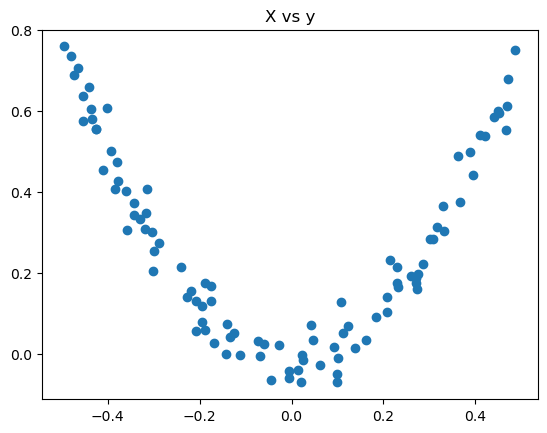

In [85]:
import matplotlib.pyplot as plt

plt.scatter(df['X'],df['y'])
plt.title('X vs y')

In [91]:
df['pred1[base_model]'] = df['y'].mean()

In [92]:
df

,X,y,pred1[base_model]
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458
...,...,...,...
95,-0.006204,-0.040675,0.265458
96,0.022733,-0.002305,0.265458
97,-0.072459,0.032809,0.265458
98,-0.474581,0.689516,0.265458


In [93]:
df['res1'] = df['y'] - df['pred1[base_model]']

In [94]:
df

,X,y,pred1[base_model],res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528
...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133
96,0.022733,-0.002305,0.265458,-0.267763
97,-0.072459,0.032809,0.265458,-0.232650
98,-0.474581,0.689516,0.265458,0.424057


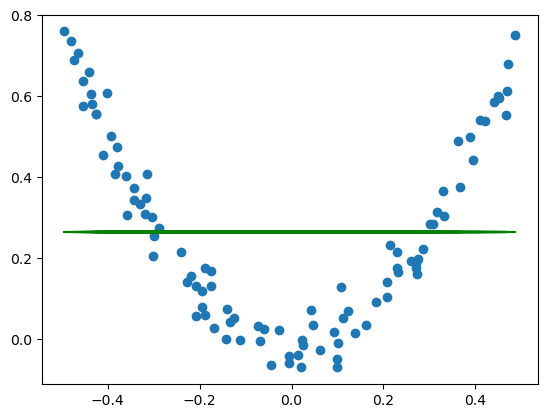

In [95]:
plt.scatter(df['X'],df['y'])
plt.plot(df['X'], df['pred1[base_model]'], color='green')

- Green line reprsents base model

In [96]:
# going to train my first DT model on top of residual

# X, res1

df['X'].values.reshape(100,1)

array([[-0.12545988],
       [ 0.45071431],
       [ 0.23199394],
       [ 0.09865848],
       [-0.34398136],
       [-0.34400548],
       [-0.44191639],
       [ 0.36617615],
       [ 0.10111501],
       [ 0.20807258],
       [-0.47941551],
       [ 0.46990985],
       [ 0.33244264],
       [-0.28766089],
       [-0.31817503],
       [-0.31659549],
       [-0.19575776],
       [ 0.02475643],
       [-0.06805498],
       [-0.20877086],
       [ 0.11185289],
       [-0.36050614],
       [-0.20785535],
       [-0.13363816],
       [-0.04393002],
       [ 0.28517596],
       [-0.30032622],
       [ 0.01423444],
       [ 0.09241457],
       [-0.45354959],
       [ 0.10754485],
       [-0.32947588],
       [-0.43494841],
       [ 0.44888554],
       [ 0.46563203],
       [ 0.30839735],
       [-0.19538623],
       [-0.40232789],
       [ 0.18423303],
       [-0.05984751],
       [-0.37796177],
       [-0.00482309],
       [-0.46561148],
       [ 0.4093204 ],
       [-0.24122002],
       [ 0

In [97]:
y = df['res1']

In [100]:
from sklearn.tree import DecisionTreeRegressor

DT1 = DecisionTreeRegressor(max_leaf_nodes = 8)
DT1.fit(X,y)

DecisionTreeRegressor(max_leaf_nodes=8)

In [101]:
from sklearn.tree import plot_tree

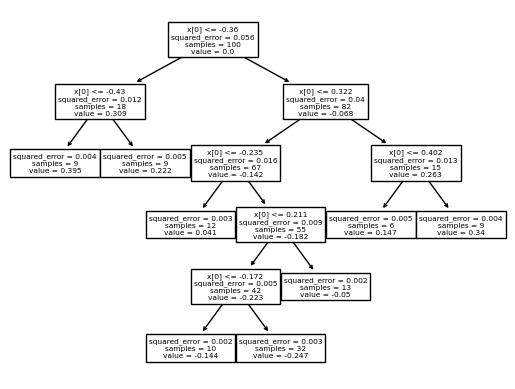

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

In [102]:
plot_tree(DT1)
plt.show()
plt.figure(figsize =(15,15))

In [104]:
df['pred2'] = DT1.predict(X)

In [105]:
df

,X,y,pred1[base_model],res1,pred2
0,-0.125460,0.051573,0.265458,-0.213885,-0.247139
1,0.450714,0.594480,0.265458,0.329021,0.340426
2,0.231994,0.166052,0.265458,-0.099407,-0.049674
3,0.098658,-0.070178,0.265458,-0.335636,-0.247139
4,-0.343981,0.343986,0.265458,0.078528,0.040506
...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,-0.247139
96,0.022733,-0.002305,0.265458,-0.267763,-0.247139
97,-0.072459,0.032809,0.265458,-0.232650,-0.247139
98,-0.474581,0.689516,0.265458,0.424057,0.395454


In [ ]:
# residual2 = actual_value -(base + alpha *pred2) 

# residual2 = actual_value -(base + learning_rate *pred2) 

In [106]:
Base = df['pred1[base_model]']

In [107]:
learning_rate = 0.1

In [110]:
df['res2'] = df['y'] - (Base+(learning_rate * df['pred2']))

In [111]:
df

,X,y,pred1[base_model],res1,pred2,res2
0,-0.125460,0.051573,0.265458,-0.213885,-0.247139,-0.189172
1,0.450714,0.594480,0.265458,0.329021,0.340426,0.294979
2,0.231994,0.166052,0.265458,-0.099407,-0.049674,-0.094439
3,0.098658,-0.070178,0.265458,-0.335636,-0.247139,-0.310922
4,-0.343981,0.343986,0.265458,0.078528,0.040506,0.074477
...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,-0.247139,-0.281420
96,0.022733,-0.002305,0.265458,-0.267763,-0.247139,-0.243049
97,-0.072459,0.032809,0.265458,-0.232650,-0.247139,-0.207936
98,-0.474581,0.689516,0.265458,0.424057,0.395454,0.384512


In [112]:
X = df['X'].values.reshape(100,1)
y = df['res2'].values

In [113]:
df

,X,y,pred1[base_model],res1,pred2,res2
0,-0.125460,0.051573,0.265458,-0.213885,-0.247139,-0.189172
1,0.450714,0.594480,0.265458,0.329021,0.340426,0.294979
2,0.231994,0.166052,0.265458,-0.099407,-0.049674,-0.094439
3,0.098658,-0.070178,0.265458,-0.335636,-0.247139,-0.310922
4,-0.343981,0.343986,0.265458,0.078528,0.040506,0.074477
...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,-0.247139,-0.281420
96,0.022733,-0.002305,0.265458,-0.267763,-0.247139,-0.243049
97,-0.072459,0.032809,0.265458,-0.232650,-0.247139,-0.207936
98,-0.474581,0.689516,0.265458,0.424057,0.395454,0.384512


In [114]:
from sklearn.tree import DecisionTreeRegressor
DT2 = DecisionTreeRegressor(max_leaf_nodes=8)
DT2.fit(X,y)

DecisionTreeRegressor(max_leaf_nodes=8)

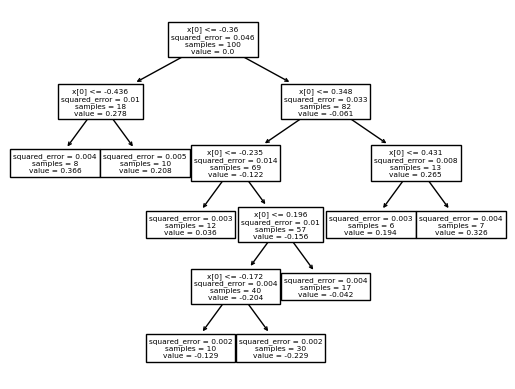

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

In [115]:
plot_tree(DT2)
plt.show()
plt.figure(figsize =(15,15))

In [ ]:
#final_pred = Base +(alpha * DT1) +(alpha*DT2)

In [ ]:
## res3 
## need to check it is getting reduced or not

In [120]:
query = [[0.45071431]]

In [121]:
pred1 = DT1.predict(query)

In [122]:
pred1

array([0.34042552])

In [123]:
pred2 = DT2.predict(query)

In [124]:
pred2

array([0.32555151])

In [117]:
#alpha
learning_rate

0.1

In [119]:
Base[0]

0.26545839669679816

In [125]:
final_pred = Base[0] + (learning_rate * pred1) + (learning_rate * pred2)

In [126]:
final_pred

array([0.3320561])